# Identificar foronteras no lineales

In [18]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X,Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

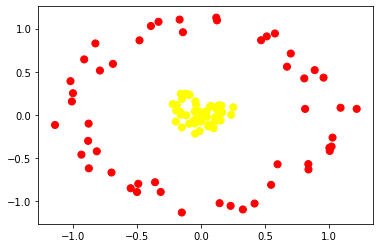

In [5]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")

[[-3.15186662e-01 -8.95203493e-01]
 [ 1.19468581e-01  1.12663013e+00]
 [-8.26021572e-01  8.27749403e-01]
 [-8.82799470e-01 -3.02687421e-01]
 [ 1.00363051e+00 -3.83125970e-01]
 [ 6.72202395e-01  5.57555426e-01]
 [ 1.45178336e-01 -1.02540223e+00]
 [-7.90688083e-01  5.13324734e-01]
 [ 2.31204691e-01 -1.05622971e+00]
 [-7.00002207e-01 -6.69653422e-01]
 [-8.14947105e-01 -4.23817333e-01]
 [-1.14167041e+00 -1.18016220e-01]
 [-1.00130238e+00  2.50113929e-01]
 [ 4.18604840e-01 -1.02925741e+00]
 [ 8.14040424e-01  6.80253093e-02]
 [ 1.02835212e+00 -2.64553243e-01]
 [-9.35146045e-01 -4.62160621e-01]
 [ 1.02078690e+00 -3.68322434e-01]
 [ 8.07416433e-01  4.21786576e-01]
 [-3.32463197e-01  1.07867814e+00]
 [ 1.00650227e+00 -4.19184875e-01]
 [ 5.47941608e-01 -8.12432918e-01]
 [ 8.39003275e-01 -5.71890595e-01]
 [ 5.98385897e-01 -5.74162797e-01]
 [-9.13388933e-01  6.42157108e-01]
 [ 8.40247485e-01 -6.34187476e-01]
 [-6.88843743e-01  5.90725543e-01]
 [-1.67353382e-01  1.10416210e+00]
 [ 7.01845926e-01  7

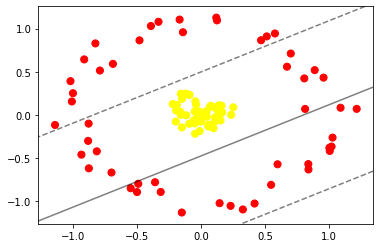

In [6]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support = False)

In [7]:
# Claramente una discriminación lineal no es posible
# podemos elevar la dimension y stablecer un separador aleatorio r

r = np.exp(-(X**2).sum(1)) # sum(1) es para normalizar

In [8]:
r

array([0.40627219, 0.27704698, 0.25474794, 0.41855182, 0.97508212,
       0.31535392, 0.91890616, 0.99825359, 0.97847736, 0.46639418,
       0.342143  , 0.41119409, 0.98770647, 0.9741219 , 0.3106536 ,
       0.97646696, 0.94030293, 0.39123816, 0.99890601, 0.97284904,
       0.43009038, 0.26784706, 0.99720903, 0.99444864, 0.99746136,
       0.34467152, 0.29095088, 0.51309757, 0.32384298, 0.98668764,
       0.33685909, 0.30799636, 0.43612551, 0.98235788, 0.99616966,
       0.27968864, 0.99991932, 0.30459789, 0.38278291, 0.35665536,
       0.96647123, 0.99855289, 0.97327306, 0.50271664, 0.28746761,
       0.33014954, 0.43890935, 0.99385751, 0.93835896, 0.94582642,
       0.28731357, 0.3688438 , 0.9990246 , 0.22624962, 0.4142977 ,
       0.95692612, 0.98085975, 0.35214476, 0.99762911, 0.31507415,
       0.99791037, 0.33162525, 0.98816461, 0.98073237, 0.47646737,
       0.29434539, 0.95071396, 0.98335275, 0.34877521, 0.9603748 ,
       0.37644836, 0.99321991, 0.95582272, 0.9869443 , 0.97230

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev = 30,azim = 30, X=X,Y=Y,r=r):
    ax = plt.subplot(projection = "3d")
    ax.scatter(X[:,0],X[:,1],r,c=Y,s=50,cmap = "autumn")
    ax.view_init(elev = elev, azim = azim)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev = [-90,-60,-30,0,30,60,90],
         azim = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], X=fixed(X), Y = fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.15186662e-01, -8.95203493e-01],
       [ 1.19468581e-01,  1.12663013e+00],
       [-8.26021572e-01,  8.27749403e-01],
       [-8.82799470e-01, -3.02687421e-01],
       [-1.58849767e-01,  5.81636452e-04],
       [ 1.00363051e+00, -3.83125970e-01],
       [-1.58634002e-01,  2.43734549e-01],
       [-1.71519990e-02,  3.81280330e-02],
       [ 5.66624702e-02, -1.36187365e-01],
       [ 6.72202395e-01,  5.57555426e-01],
       [ 1.45178336e-01, -1.02540223e+00],
       [-7.90688083e-01,  5.13324734e-01],
       [-4.74441200e-02, -1.00592149e-01],
       [-4.34067289e-02,  1.55995778e-01],
       [ 2.31204691e-01, -1.05622971e+00],
       [ 1.24220550e-01,  9.15621153e-02],
       [-8.92628784e-02,  2.31485053e-01],
       [-7.00002207e-01, -6.69653422e-01],
       [-4.28051202e-03, -3.28064831e-02],
       [ 1.52126143e-01, -6.62117435e-02],
       [-8.14947105e-01, -4.23817333e-01],
       [-1.14167041e+00, -1.18016220e-01],
       

In [13]:
# ahora si podemos separar con un hiperplano, aunque esto no siempre funcionara de forma tan trivial
# por lo que buscaremos otra alternativa para la gran mayoria de los casos que nos toque analizar

In [14]:
rbf = SVC(kernel="rbf", C=1E6) # radial bases function
rbf.fit(X,Y) # solo hemos cambiado el tipo de kernel

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[ 0.6722024   0.55755543]
 [ 0.81404042  0.06802531]
 [ 0.5983859  -0.5741628 ]
 [-0.68884374  0.59072554]
 [-0.35952287 -0.78236778]
 [-0.14141925  0.95732423]
 [-0.87897295 -0.10237411]
 [-0.158634    0.24373455]
 [-0.04656389 -0.21994054]
 [ 0.25232587  0.08645428]]


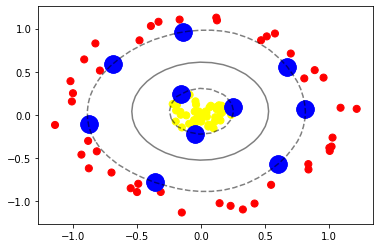

In [15]:
plt.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1],s=300, lw=1, facecolors = "blue")

## Ajustar los parámetros de SVM

la importancia de ajustar bien el parametro C, el cual determina el tamaño del soporte

In [25]:
X,Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)

[[-8.90728186e-02  1.92683157e+00]
 [ 1.53506501e+00  2.46029490e+00]
 [ 2.34355090e+00  2.82199634e+00]
 [-2.81993480e-01  2.59976580e+00]
 [ 3.69997563e+00  2.55854852e+00]
 [ 3.23605092e+00  2.68647645e+00]
 [ 3.21733967e+00  3.13105387e+00]
 [ 2.01359352e+00  3.41318930e+00]
 [ 1.35195132e+00  3.27887244e+00]
 [ 4.94540093e-04  2.23224820e+00]
 [ 3.63303913e-01  2.88702871e+00]
 [ 4.65115066e+00  2.50149720e+00]
 [ 4.36279795e+00  2.67428141e+00]
 [ 1.16779193e+00  2.74928117e+00]
 [ 2.41315333e+00  2.48932674e+00]
 [ 1.53308326e+00  3.11678013e+00]
 [ 1.97337760e+00  2.95367493e+00]
 [ 6.47519435e-01  3.23000908e+00]
 [ 1.45762858e+00  3.21310212e+00]
 [ 8.14176111e-01  1.71557708e+00]
 [ 1.02179670e+00  3.18974160e+00]
 [ 9.59880851e-01  2.23808321e+00]
 [ 5.84744899e-01  1.91089923e+00]]


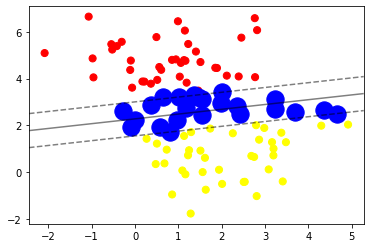

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y, s= 50, cmap="autumn")
model = SVC(kernel = "linear", C = 20)
model.fit(X,Y)
plt_svc(model)

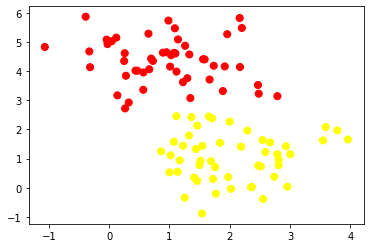

In [21]:
X,Y  = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:,0],X[:,1],c=Y, s = 50, cmap = "autumn")

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]


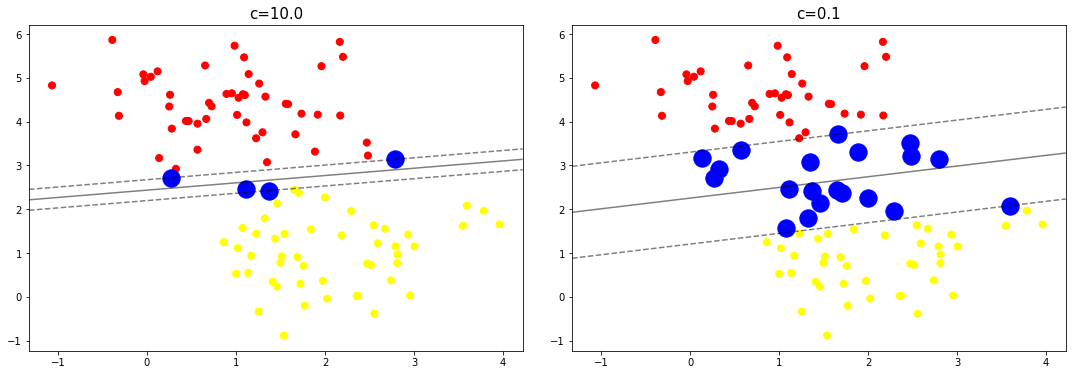

In [24]:
fig , ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i , C in zip(ax,[10.0,0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0] , X[:,1], c=Y, s=50, cmap = "autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("c={0:.1f}".format(C), size = 15)